## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Number of rows in the dataset: 294478**

c. The number of unique users in the dataset.

In [58]:
df.user_id.nunique()

290584

**Number of unique users in the dataset: 290584**

d. The proportion of users converted.

In [59]:
df.query('converted == 1').user_id.size / df.user_id.size

0.11965919355605512

**Proportion of users converted: 0.11965919355605512**

e. The number of times the `new_page` and `treatment` don't match.

In [60]:
df.query(' landing_page == "new_page" and group == "control" ').user_id.size

1928

In [61]:
df.query(' landing_page == "old_page" and group == "treatment" ').user_id.size

1965

**The number of times the new_page and treatment don't match: 1928 + 1965 = 3893**

f. Do any of the rows have missing values?

In [62]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [63]:
# Create a new dataset that meets the "old page & control", "new page & treatment"
df_1 = df.query(' landing_page == "old_page" and group == "control" ')
df_2 = df.query(' landing_page == "new_page" and group == "treatment" ')
df2 = df_1.append(df_2)

In [64]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [65]:
df2.user_id.nunique()

290584

**Number of unique users in the dataset: 290584**

b. There is one **user_id** repeated in **df2**.  What is it?

In [66]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [67]:
df.iloc[2893]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [68]:
df2 = df2.drop(2893)
df2 = df2.reset_index(drop = True)
df2.iloc[2893]

user_id                             863664
timestamp       2017-01-16 17:37:20.290015
group                              control
landing_page                      old_page
converted                                0
Name: 2893, dtype: object

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [69]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [70]:
df2.query( ' group == "control" ').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [71]:
df2.query(' group == "treatment" ').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [72]:
df2.query(' landing_page == "new_page" ').user_id.size / df2.user_id.size

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The probability of convertion is 11.95%. The probability of convertion for control group is 12.04%. The probability of convertion for treatment group is 11.88%. The difference is 11.88% - 12.04% = -0.16% = -0.0016. Since prob(treatment_group) < prob(control_group), we don't have sufficient evidence to conclude that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [73]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**Convert rate for p_new under the null: 0.11959708724499628**

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [74]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

**Convert rate for p_old under the null: 0.11959708724499628**

c. What is $n_{new}$, the number of individuals in the treatment group?

In [75]:
n_new = df2.query(' group == "treatment" ').user_id.size

**n_new: 145310**

d. What is $n_{old}$, the number of individuals in the control group?

In [76]:
n_old = df2.query(' group == "control" ').user_id.size

**n_old: 145274**

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [77]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17261

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [78]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17489

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [79]:
(new_page_converted/n_new) - (old_page_converted/n_old)

-0.0015988845018375664

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [80]:
# Create 10,000 values using the SAME simulation process --> "Bootstrapping"

p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diff = new_page_converted / n_new - old_page_converted / n_old
    p_diffs.append(p_diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'Sampling distribution of p_diffs')

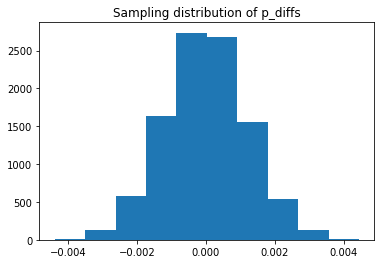

In [81]:
#Convert to numpy array
p_diffs = np.array(p_diffs)

#Plot Sampling distribution
plt.hist(p_diffs);
plt.title('Sampling distribution of p_diffs')

Text(0.5,1,'Distritbution of null_vals')

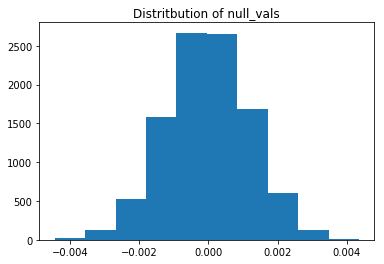

In [82]:
#Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

#Plot the null distribution
plt.hist(null_vals);
plt.title('Distritbution of null_vals')

Text(0.5,1,'Distribution of null_vals')

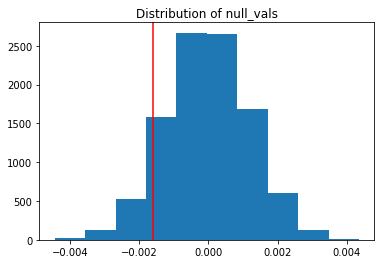

In [83]:
#Observed difference
obs_diff = -0.0016
#Plot observed statistic with the null distribution
plt.hist(null_vals);
plt.axvline(obs_diff, c = 'red')
plt.title('Distribution of null_vals')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [84]:
#P_value
p_diff_original = df[df['landing_page'] == 'new_page']['converted'].mean() - df[df['landing_page'] == 'old_page']['converted'].mean()
p_diff_original

-0.0016367945992569882

In [85]:
p_diffs = np.array(p_diffs)
p_diff_p = (p_diff_original < p_diffs).mean()
p_diff_p

0.91549999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Since p value = 0.915 (0.915 > 0.05), we fail to reject H0. It means the difference is very insignificant with the probability of 0.915. Thus, the new page is not better than the old.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [86]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

convert_old = df2.query(' group == "control" and converted == 1 ').user_id.size
convert_new = df2.query(' group == "treatment" and converted == 1 ').user_id.size
n_old = df2.query(' group == "control" ').user_id.size
n_new = df2.query(' group == "treatment" ').user_id.size

In [87]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [88]:
z_score, p_value  = sm.stats.proportions_ztest( [convert_old, convert_new], [n_old, n_new], alternative = 'smaller' )


In [89]:
z_score, p_value # Two_tailed test result

(1.3109241984234394, 0.90505831275902449)

In [90]:
#z_test
from scipy.stats import norm

#Significant of z_score
print(norm.cdf(z_score))

#For one_tailed test, we set our significant level = 95%
print(norm.ppf(1 - (0.05)))

0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since 1.310924 < 1.644854 and p_value = 0.915 (0.915 > 0.05), we fail to reject H0. We find that the old page conversions are slightly better than new page conversions. It matches the previous results we find in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
df2['intercept'] = 1

df2[ 'ab_page' ] = pd.get_dummies(df2[ 'group' ])[ 'treatment' ]
df2[ [ 'new_page', 'old_page'] ] = pd.get_dummies(df2[ 'landing_page' ])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [92]:
import statsmodels.api as sm

df2[ 'intercept' ] = 1
log_mod = sm.Logit(df2[ 'converted' ], df2[[ 'intercept', 'ab_page' ]])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        00:43:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P-value(ab_page) = 0.190. Since 0.190 > 0.05, the new page is not statistivally significant here. It differ from the value i found in part II. In this section it was a two-sided test and in part II it was a one-sided test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are might be many factors that can effect individual converts. We can find new trends using other factors. However, there may be some advantages such as new factors may cause other primary factors to become unrealiable or lead to contradictory results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [94]:
#Read the dataset and merge df2 & df_country together
df_country = pd.read_csv('countries.csv')
df_new = df_country.set_index('user_id').join(df2.set_index('user_id'), how = 'inner' )
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [95]:
#Create Dummy Variables
df_new[ [ 'CA', 'UK', 'US' ] ] = pd.get_dummies(df_new ['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1,0


In [96]:
#Provide the statistical output
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        00:43:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Conclusion: Since p_value(CA) = 0.129 >0.05, p_value(UK) = 0.456 > 0.05, we fail to reject the Null Hypothesis. Therefore, countries don't have impacts on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [97]:
#Fit linear model and summarize
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK', 'ab_page']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:               2.323e-05
Time:                        00:43:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Conclusion: Since p_value(ab_page) = 0.191 >0.05, and p_value(country) = (0.130, 0.457) > 0.05, we fail to reject the Null Hypothesis. Moreover, ther is NO significant interaction between 'ab_page' and 'country' because the coefficient of 'ab_page' is negative, it does not change as 'country' is introduced. Therefore, conversion has NO significant relationship with landing_page or country.**

In [98]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0